## 간단한 GUI App을 만들어보자
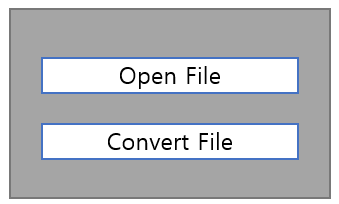
- Open File : pptx 파일을 열기 
- Convert File : csv로 변환후 같은 파일이름음 .csv 로 저장하기 

In [1]:
from pptx import Presentation
import pandas as pd
import tkinter.ttk as ttk
import tkinter.messagebox as msgbox
from tkinter import * # __all__
from tkinter import filedialog

MAX_ITEM_NO = 12

## 간단한 GUI Layout

In [6]:
root = Tk()
root.title("PPTX SOP Converter")
root.geometry("200x120")

# Frame 
frame = Frame(root)
frame.pack(fill="x", padx=5, pady=5) # 간격 띄우기

btn_open_file = Button(frame, padx=5, pady=5, text="Open File", command=open_file)
btn_open_file.pack(fill="x",side="top",padx=5, pady=5)

btn_start = Button(frame, padx=5, pady=5, text="Convert", command=convert)
btn_start.pack(fill="x",side="top", padx=5, pady=5)

# Runs
root.mainloop()

## GUI Event Fucntions
- open_file() : file diaglog 를 연뒤 선택한 sop file 의 경로를 저장 
- convert() : pptx 파일을 memory 에 load 하고 변환과정을 거친뒤 같은 파일명의 csv 파일로 저장

In [3]:
sopfile = ''
def open_file():
    global sopfile
    try:
        sopfile = filedialog.askopenfilename(initialdir=r'C:\Users\ParkGY\DocumentsCFLTYanadoo\DT Academy\SOPMeterial',title="select a file",
                                            filetypes =(("Perenstaion","*.pptx"),
                                            ("all files","*.*")))
    except:
        pass
    
def convert():        
    prs = Presentation(sopfile)  
    df = pd.DataFrame(columns=['OperationStep','Man.Item.No','Description','Qty'])
    for slide in prs.slides:
        items = GetItemsInSlide(slide) 
        if items : # items list 에 데이터가 있으면 추가 
            for item in items:
                df.loc[len(df)] = item
            
    f_name = sopfile.split('.')[0] + '.csv' 
    df.to_csv(f_name, encoding='utf-8-sig', index=False, mode='w', header=True)   


## Functions

In [4]:
def getTextInRowCol(table, row, col) : 
    text = ''
    try:
        for paragraph in table.cell(row,col).text_frame.paragraphs:
            for run in paragraph.runs:
                text += run.text 
    except:
        pass
    return text

def GetItemInTable(table, idx):        
    OP_ROW = 1 
    OP_COL = 3
    FIRST_ROW = 3
    LEFT_ITEM_COL = 3 
    LEFT_DES_COL = 9
    LEFT_QTY_COL = 13
    RIGHT_ITEM_COL = 15 
    RIGHT_DES_COL = 18
    RIGHT_QTY_COL = 21
    
    right_first_item_no = int(MAX_ITEM_NO / 2)
    
    if idx < right_first_item_no :
        op_num = getTextInRowCol(table, OP_ROW, OP_COL)
        item_no = getTextInRowCol(table, FIRST_ROW + idx, LEFT_ITEM_COL)
        des = getTextInRowCol(table, FIRST_ROW + idx, LEFT_DES_COL )
        qty = getTextInRowCol(table, FIRST_ROW + idx, LEFT_QTY_COL)

    else:
        op_num = getTextInRowCol(table, OP_ROW, OP_COL)
        item_no = getTextInRowCol(table, FIRST_ROW + idx - right_first_item_no, RIGHT_ITEM_COL)
        des = getTextInRowCol(table, FIRST_ROW  + idx - right_first_item_no, RIGHT_DES_COL)
        qty = getTextInRowCol(table, FIRST_ROW + idx - right_first_item_no, RIGHT_QTY_COL)
    
    item_list = [op_num, item_no, des, qty]         
    return item_list

def GetItemsInSlide(slide):
    items = []
    if slide.shapes[0].has_table:
        table = slide.shapes[0].table
        for idx in range(0, MAX_ITEM_NO):
            item = GetItemInTable(table, idx)
            if item[3].isnumeric() and item[2]: # Description에 데이터가 있고 qty가 숫자이면 데이터 인정 
                items.append(item)
        return items